## Notebook imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score,mean_squared_error

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

sns.set()

## Dataset 
[Dataset Link: Source From Kaggle](https://www.kaggle.com/harlfoxem/housesalesprediction)

## Project Report
[Project report link: Googledrive](https://drive.google.com/file/d/1p7LZERo07MncVbs7Gj4WqJnoULaMMFlk/view?usp=sharing)

In [2]:
#we read and visualize our dataset using pandas dataframe
data = pd.read_csv("C:/github/kc_house_data.csv")

In [3]:
data.head() #to read the top five rolls of our dataset

id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1955             0    98178  47.5112 -122.257           1340   
1      1951          1991    98125  47.7210 -122.319           1690   
2      1933             0    98028  47.7379 -122.233           2720   
3      1965             0    98136  47.5208 -122.393           1360   
4      1987             0    98074  47.6168 -122.045           1800   

   sqft_lot15  
0        5650  
1        7639  
2        8062  
3        5000  
4        7503  

[5 rows x 21 columns]

In [4]:
data.tail() #to read the last five rolls of our dataset

id             date     price  bedrooms  bathrooms  \
21608   263000018  20140521T000000  360000.0         3       2.50   
21609  6600060120  20150223T000000  400000.0         4       2.50   
21610  1523300141  20140623T000000  402101.0         2       0.75   
21611   291310100  20150116T000000  400000.0         3       2.50   
21612  1523300157  20141015T000000  325000.0         2       0.75   

       sqft_living  sqft_lot  floors  waterfront  view  ...  grade  \
21608         1530      1131     3.0           0     0  ...      8   
21609         2310      5813     2.0           0     0  ...      8   
21610         1020      1350     2.0           0     0  ...      7   
21611         1600      2388     2.0           0     0  ...      8   
21612         1020      1076     2.0           0     0  ...      7   

       sqft_above  sqft_basement  yr_built  yr_renovated  zipcode      lat  \
21608        1530              0      2009             0    98103  47.6993   
21609        2310              0      2014             0    98146  47.5107   
21610        1020              0      2009             0    98144  47.5944   
21611        1600              0      2004             0    98027  47.5345   
21612        1020              0      2008             0    98144  47.5941   

          long  sqft_living15  sqft_lot15  
21608 -122.346           1530        1509  
21609 -122.362           1830        7200  
21610 -122.299           1020        2007  
21611 -122.069           1410        1287  
21612 -122.299           1020        1357  

[5 rows x 21 columns]

## Cleaning data - check for any missing values

In [5]:
type(data)

pandas.core.frame.DataFrame

In [6]:
data.shape

(21613, 21)

In [7]:
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [8]:
pd.isnull(data).sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [9]:
dataset = data.drop(['id', 'date'], axis = 1)
dataset.shape

(21613, 19)

In [10]:
dataset.count() # show the number of row

price            21613
bedrooms         21613
bathrooms        21613
sqft_living      21613
sqft_lot         21613
floors           21613
waterfront       21613
view             21613
condition        21613
grade            21613
sqft_above       21613
sqft_basement    21613
yr_built         21613
yr_renovated     21613
zipcode          21613
lat              21613
long             21613
sqft_living15    21613
sqft_lot15       21613
dtype: int64

In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 19 columns):
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(14)
memory usage: 3.1 MB


In [12]:
dataset['bedrooms'].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      199
7       38
8       13
0       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [13]:
dataset[dataset.bedrooms == 33].index

Int64Index([15870], dtype='int64')

In [14]:
dataset[15868:15872]

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
15868  570000.0         4       3.50         3990     23544     1.0   
15869  362000.0         3       2.50         2310      7485     2.0   
15870  640000.0        33       1.75         1620      6000     1.0   
15871  172500.0         3       1.00         1140      8800     1.0   

       waterfront  view  condition  grade  sqft_above  sqft_basement  \
15868           0     2          3     10        2300           1690   
15869           0     0          3      8        2310              0   
15870           0     0          5      7        1040            580   
15871           0     0          3      7        1140              0   

       yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
15868      1999             0    98023  47.3245 -122.380           3410   
15869      1986             0    98058  47.4390 -122.135           2310   
15870      1947             0    98103  47.6878 -122.331           1330   
15871      1972             0    98001  47.2629 -122.275           1270   

       sqft_lot15  
15868       15932  
15869        8142  
15870        4700  
15871       13560

In [15]:
dataset.drop([15870], axis = 0, inplace=True)

dataset[15868:15872]

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
15868  570000.0         4        3.5         3990     23544     1.0   
15869  362000.0         3        2.5         2310      7485     2.0   
15871  172500.0         3        1.0         1140      8800     1.0   
15872  596000.0         2        1.0         1040      4880     1.0   

       waterfront  view  condition  grade  sqft_above  sqft_basement  \
15868           0     2          3     10        2300           1690   
15869           0     0          3      8        2310              0   
15871           0     0          3      7        1140              0   
15872           0     0          3      7        1040              0   

       yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
15868      1999             0    98023  47.3245 -122.380           3410   
15869      1986             0    98058  47.4390 -122.135           2310   
15871      1972             0    98001  47.2629 -122.275           1270   
15872      1910          1975    98115  47.6809 -122.311           1500   

       sqft_lot15  
15868       15932  
15869        8142  
15871       13560  
15872        4590

In [16]:
dataset['bedrooms'].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      199
7       38
8       13
0       13
9        6
10       3
11       1
Name: bedrooms, dtype: int64

In [17]:
dataset[dataset.bedrooms == 0].index

Int64Index([875, 3119, 3467, 4868, 6994, 8477, 8484, 9773, 9854, 12653, 14423,
            18379, 19452],
           dtype='int64')

In [21]:
dataset.drop([875, 3119, 3467, 4868, 6994, 8477, 8484, 9773, 9854, 12653, 14423,18379, 19452], axis = 0, inplace=True)

In [22]:
dataset['bedrooms'].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      199
7       38
8       13
9        6
10       3
11       1
Name: bedrooms, dtype: int64

In [23]:
dataset['bathrooms'].value_counts()

2.50    5377
1.00    3851
1.75    3047
2.25    2047
2.00    1930
1.50    1445
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      71
4.75      23
5.00      21
5.25      13
5.50      10
1.25       9
6.00       6
0.50       4
5.75       4
0.00       3
8.00       2
6.25       2
6.50       2
6.75       2
7.50       1
7.75       1
Name: bathrooms, dtype: int64

In [24]:
dataset[dataset.bathrooms == 0].index

Int64Index([1149, 5832, 10481], dtype='int64')

In [31]:
dataset.drop([1149, 5832, 10481], axis = 0, inplace=True)

In [32]:
dataset['bathrooms'].value_counts()

2.50    5377
1.00    3851
1.75    3047
2.25    2047
2.00    1930
1.50    1445
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      71
4.75      23
5.00      21
5.25      13
5.50      10
1.25       9
6.00       6
5.75       4
0.50       4
8.00       2
6.25       2
6.75       2
6.50       2
7.50       1
7.75       1
Name: bathrooms, dtype: int64

In [33]:
dataset['waterfront'].value_counts()

0    21433
1      163
Name: waterfront, dtype: int64

In [34]:
dataset['view'].value_counts()

0    19474
2      961
3      510
1      332
4      319
Name: view, dtype: int64

In [35]:
dataset.shape

(21596, 19)

## Exploratory data analysis
#### Visualising Our Dataset - Histograms, Distributions ...

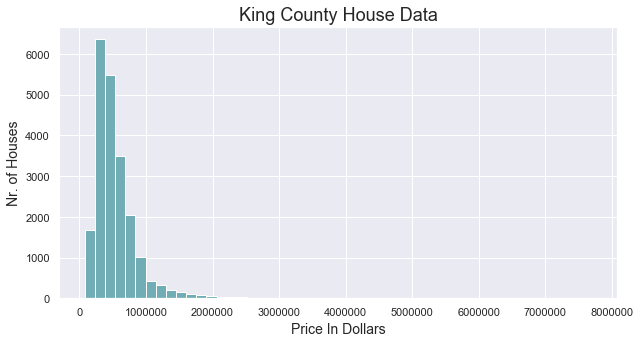

In [37]:
plt.figure(figsize=(10, 5))
plt.hist(dataset['price'],color='#70adb5',bins = 50)
plt.title('King County House Data', fontsize = 18)
plt.xlabel('Price In Dollars',fontsize = 14)
plt.ylabel('Nr. of Houses',fontsize = 14)
plt.show()

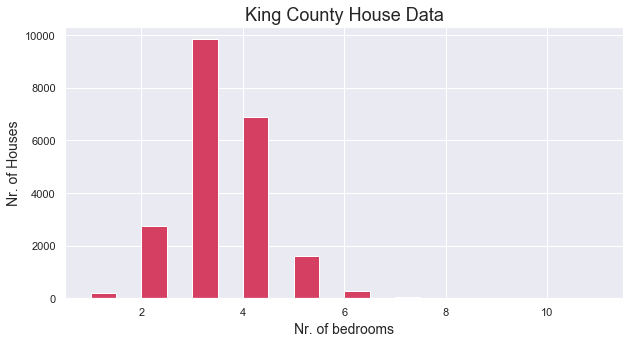

In [38]:
plt.figure(figsize=(10, 5))
plt.hist(dataset['bedrooms'],color='#d54062',bins = 20)
plt.title('King County House Data', fontsize = 18)
plt.xlabel('Nr. of bedrooms',fontsize = 14)
plt.ylabel('Nr. of Houses',fontsize = 14)
plt.show()

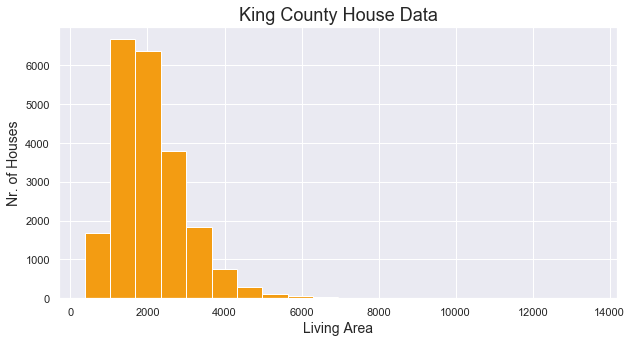

In [39]:
plt.figure(figsize=(10, 5))
plt.hist(dataset['sqft_living'],color='#f39c12',bins = 20)
plt.title('King County House Data', fontsize = 18)
plt.xlabel('Living Area',fontsize = 14)
plt.ylabel('Nr. of Houses',fontsize = 14)
plt.show()

## Descriptive Statistics

In [40]:
dataset['price'].min()

78000.0

In [41]:
dataset['price'].max()

7700000.0

In [42]:
dataset['bedrooms'].mean()

3.3718281163178365

In [43]:
dataset.min()

price            78000.0000
bedrooms             1.0000
bathrooms            0.5000
sqft_living        370.0000
sqft_lot           520.0000
floors               1.0000
waterfront           0.0000
view                 0.0000
condition            1.0000
grade                3.0000
sqft_above         370.0000
sqft_basement        0.0000
yr_built          1900.0000
yr_renovated         0.0000
zipcode          98001.0000
lat                 47.1559
long              -122.5190
sqft_living15      399.0000
sqft_lot15         651.0000
dtype: float64

In [44]:
dataset.describe()

price      bedrooms     bathrooms   sqft_living      sqft_lot  \
count  2.159600e+04  21596.000000  21596.000000  21596.000000  2.159600e+04   
mean   5.401983e+05      3.371828      2.115843   2080.343165  1.509983e+04   
std    3.671416e+05      0.904114      0.768998    918.122038  4.141355e+04   
min    7.800000e+04      1.000000      0.500000    370.000000  5.200000e+02   
25%    3.220000e+05      3.000000      1.750000   1430.000000  5.040000e+03   
50%    4.500000e+05      3.000000      2.250000   1910.000000  7.619000e+03   
75%    6.450000e+05      4.000000      2.500000   2550.000000  1.068550e+04   
max    7.700000e+06     11.000000      8.000000  13540.000000  1.651359e+06   

             floors    waterfront          view     condition         grade  \
count  21596.000000  21596.000000  21596.000000  21596.000000  21596.000000   
mean       1.494119      0.007548      0.234303      3.409752      7.657946   
std        0.539685      0.086551      0.766406      0.650471      1.173218   
min        1.000000      0.000000      0.000000      1.000000      3.000000   
25%        1.000000      0.000000      0.000000      3.000000      7.000000   
50%        1.500000      0.000000      0.000000      3.000000      7.000000   
75%        2.000000      0.000000      0.000000      4.000000      8.000000   
max        3.500000      1.000000      4.000000      5.000000     13.000000   

         sqft_above  sqft_basement      yr_built  yr_renovated       zipcode  \
count  21596.000000   21596.000000  21596.000000  21596.000000  21596.000000   
mean    1788.631506     291.711660   1971.000787     84.468698  98077.950685   
std      827.763251     442.673703     29.375460    401.830330     53.514040   
min      370.000000       0.000000   1900.000000      0.000000  98001.000000   
25%     1190.000000       0.000000   1951.000000      0.000000  98033.000000   
50%     1560.000000       0.000000   1975.000000      0.000000  98065.000000   
75%     2210.000000     560.000000   1997.000000      0.000000  98118.000000   
max     9410.000000    4820.000000   2015.000000   2015.000000  98199.000000   

                lat          long  sqft_living15     sqft_lot15  
count  21596.000000  21596.000000   21596.000000   21596.000000  
mean      47.560087   -122.213977    1986.650722   12758.656649  
std        0.138552      0.140725     685.231768   27275.018316  
min       47.155900   -122.519000     399.000000     651.000000  
25%       47.471100   -122.328000    1490.000000    5100.000000  
50%       47.571800   -122.231000    1840.000000    7620.000000  
75%       47.678000   -122.125000    2360.000000   10083.000000  
max       47.777600   -121.315000    6210.000000  871200.000000

## Correlation

## $$ \rho _{XY} = corr(X,Y)$$
## $$ -1.0 \leq \rho _{XY} \leq +1.0 $$

In [45]:
#correlation between property prices and number of bedrooms
dataset['price'].corr(dataset['bedrooms'])

0.3159664953582576

In [46]:
#correlation between property prices and the sqft_living
dataset['price'].corr(dataset['sqft_living'])

0.7019208734913488

In [41]:
dataset.corr() # Pearson Correlation Coefficients

price  bedrooms  bathrooms  sqft_living  sqft_lot    floors  \
price          1.000000  0.317189   0.525918     0.701969  0.089706  0.256627   
bedrooms       0.317189  1.000000   0.528637     0.594060  0.033241  0.182417   
bathrooms      0.525918  0.528637   1.000000     0.755824  0.087960  0.502423   
sqft_living    0.701969  0.594060   0.755824     1.000000  0.172999  0.353716   
sqft_lot       0.089706  0.033241   0.087960     0.172999  1.000000 -0.005055   
floors         0.256627  0.182417   0.502423     0.353716 -0.005055  1.000000   
waterfront     0.266440 -0.006700   0.063755     0.103880  0.021602  0.023743   
view           0.397362  0.083264   0.188428     0.284804  0.074796  0.028781   
condition      0.036150  0.024039  -0.126250    -0.059185 -0.008883 -0.264024   
grade          0.667882  0.368739   0.665995     0.763045  0.113956  0.458704   
sqft_above     0.605416  0.493384   0.686784     0.876476  0.183681  0.523810   
sqft_basement  0.323856  0.309539   0.283394     0.435129  0.015337 -0.245899   
yr_built       0.053902  0.161947   0.507322     0.318226  0.053076  0.489492   
yr_renovated   0.126535  0.017707   0.050342     0.055182  0.007699  0.006195   
zipcode       -0.053428 -0.158827  -0.204932    -0.199789 -0.129543 -0.059479   
lat            0.306803 -0.011297   0.024238     0.052212 -0.085651  0.049289   
long           0.022068  0.137143   0.225211     0.241298  0.229552  0.126134   
sqft_living15  0.585248  0.405951   0.569884     0.756412  0.144654  0.279926   
sqft_lot15     0.082500  0.031047   0.087576     0.183478  0.718543 -0.011090   

               waterfront      view  condition     grade  sqft_above  \
price            0.266440  0.397362   0.036150  0.667882    0.605416   
bedrooms        -0.006700  0.083264   0.024039  0.368739    0.493384   
bathrooms        0.063755  0.188428  -0.126250  0.665995    0.686784   
sqft_living      0.103880  0.284804  -0.059185  0.763045    0.876476   
sqft_lot         0.021602  0.074796  -0.008883  0.113956    0.183681   
floors           0.023743  0.028781  -0.264024  0.458704    0.523810   
waterfront       1.000000  0.401971   0.016648  0.082873    0.072124   
view             0.401971  1.000000   0.046127  0.251691    0.167667   
condition        0.016648  0.046127   1.000000 -0.146297   -0.158616   
grade            0.082873  0.251691  -0.146297  1.000000    0.756239   
sqft_above       0.072124  0.167667  -0.158616  0.756239    1.000000   
sqft_basement    0.080593  0.277197   0.173868  0.168483   -0.052097   
yr_built        -0.026191 -0.053767  -0.361560  0.447429    0.424048   
yr_renovated     0.092943  0.104081  -0.060589  0.014444    0.023139   
zipcode          0.030273  0.084626   0.002838 -0.185778   -0.261542   
lat             -0.014283  0.005942  -0.015123  0.113732   -0.001132   
long            -0.041909 -0.078142  -0.105791  0.200391    0.344877   
sqft_living15    0.086502  0.280663  -0.092977  0.713527    0.731734   
sqft_lot15       0.030708  0.072698  -0.003250  0.119675    0.194213   

               sqft_basement  yr_built  yr_renovated   zipcode       lat  \
price               0.323856  0.053902      0.126535 -0.053428  0.306803   
bedrooms            0.309539  0.161947      0.017707 -0.158827 -0.011297   
bathrooms           0.283394  0.507322      0.050342 -0.204932  0.024238   
sqft_living         0.435129  0.318226      0.055182 -0.199789  0.052212   
sqft_lot            0.015337  0.053076      0.007699 -0.129543 -0.085651   
floors             -0.245899  0.489492      0.006195 -0.059479  0.049289   
waterfront          0.080593 -0.026191      0.092943  0.030273 -0.014283   
view                0.277197 -0.053767      0.104081  0.084626  0.005942   
condition           0.173868 -0.361560     -0.060589  0.002838 -0.015123   
grade               0.168483  0.447429      0.014444 -0.185778  0.113732   
sqft_above         -0.052097  0.424048      0.023139 -0.261542 -0.001132   
sqft_basement       1.000000 -0.132944      

In [42]:
mask = np.zeros_like(dataset.corr())
triangle_indices = np.triu_indices_from(mask)
mask[triangle_indices] = True
mask

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.

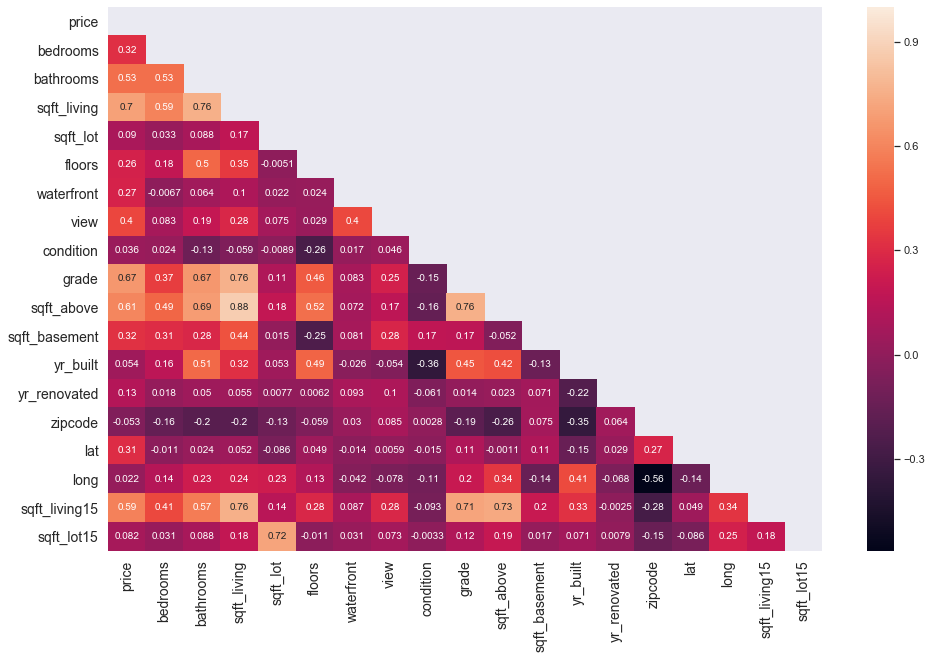

In [43]:
plt.figure(figsize=(16,10))
sns.heatmap(dataset.corr(), annot=True, mask=mask, annot_kws={"size": 10})
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

## Advanced Visialization

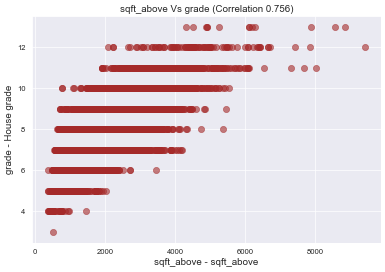

In [44]:
# a scatter plot between the sqft_above and grade and correlation
sqft_above_grade_corr = round(dataset['sqft_above'].corr(dataset['grade']), 3)

plt.figure(figsize=(9, 6), dpi=50)
plt.scatter(x=dataset['sqft_above'], y=dataset['grade'], alpha=0.6, s=80, color='brown')

plt.title(f'sqft_above Vs grade (Correlation {sqft_above_grade_corr})', fontsize=14)
plt.xlabel('sqft_above - sqft_above', fontsize=14)
plt.ylabel('grade - House grade', fontsize=14)
plt.show()

C:\Users\Admin\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


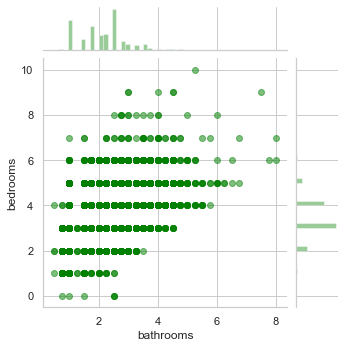

In [45]:
# a scatter plot between the house bathrooms and the bedrooms 
sns.set()
sns.set_context('notebook')
sns.set_style('whitegrid')
sns.jointplot(x=dataset['bathrooms'], y=dataset['bedrooms'], size=5, color='green', joint_kws={'alpha':0.5})
plt.show()

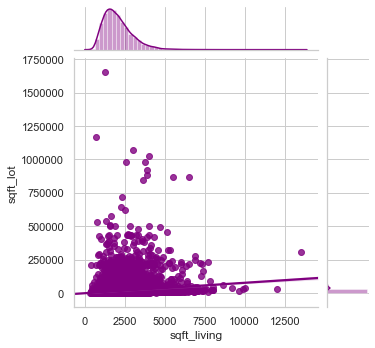

In [46]:
# a scatter plot between the house sqft_living and the sqft_lot 
sns.set()
sns.set_context('notebook')
sns.set_style('whitegrid')
sns.jointplot(x=dataset['sqft_living'], y=dataset['sqft_lot'], kind='reg', size=5, color='purple')
plt.show()

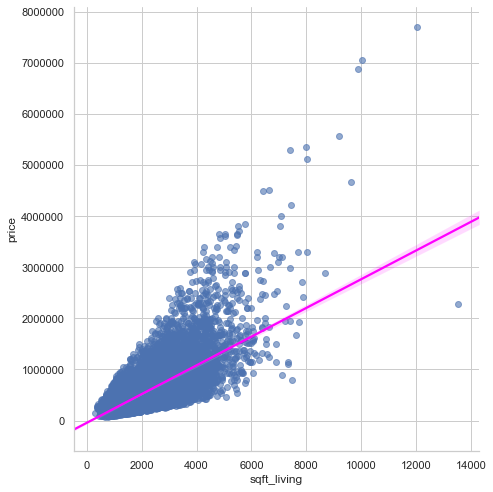

In [47]:
# a scatter plot between the house price and the sqft_living 
sns.set()
sns.set_context('notebook')
sns.set_style('whitegrid')
sns.lmplot(x='sqft_living', y='price', data=data, height=7, scatter_kws={'alpha': 0.6}, line_kws={'color':'Fuchsia'})
plt.show()

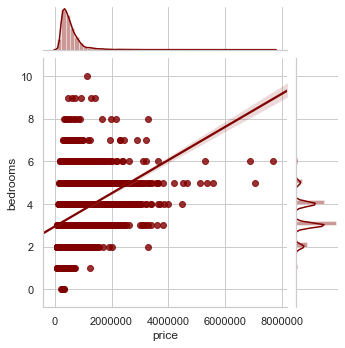

In [48]:
# a scatter plot between the house prices and the number of bedrooms 
sns.set()
sns.set_context('notebook')
sns.set_style('whitegrid')
sns.jointplot(x=dataset['price'], y=dataset['bedrooms'], kind='reg', size=5, color='maroon')
plt.show()

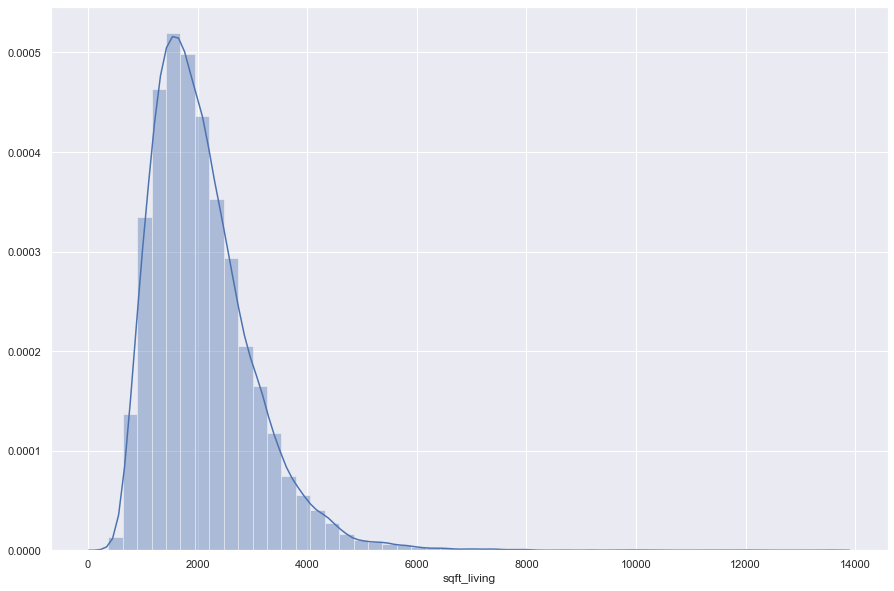

In [50]:
# A distplot is plotted for sqft living to see if the data is skewed or not
plt.subplots(nrows=1,ncols=1,figsize=(15,10))
sns.distplot(dataset['sqft_living'],hist=True,kde=True,rug=False,label='sqft_living',norm_hist=True)

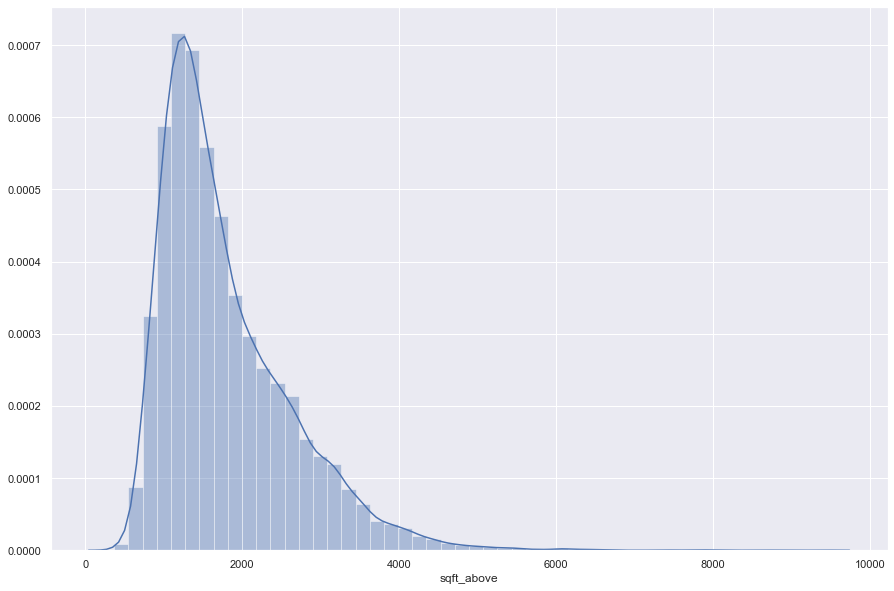

In [51]:
# A distplot is plotted for sqft above to see if the data is skewed or not
plt.subplots(nrows=1,ncols=1,figsize=(15,10))
sns.distplot(dataset['sqft_above'],hist=True,kde=True,rug=False,label='sqft_above',norm_hist=True)

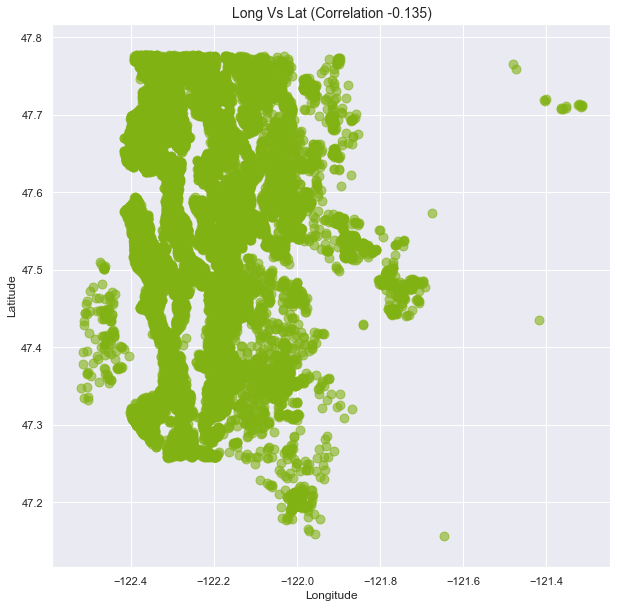

In [52]:
long_lat_corr = round(dataset['lat'].corr(dataset['long']), 3)
plt.figure(figsize=(10,10))
plt.scatter(x=dataset.long.values, y=dataset.lat.values,color='#81b214',alpha=0.6, s=80)
plt.title(f'Long Vs Lat (Correlation {long_lat_corr})', fontsize=14)
plt.ylabel('Latitude', fontsize=12)
plt.xlabel('Longitude', fontsize=12)
plt.show()

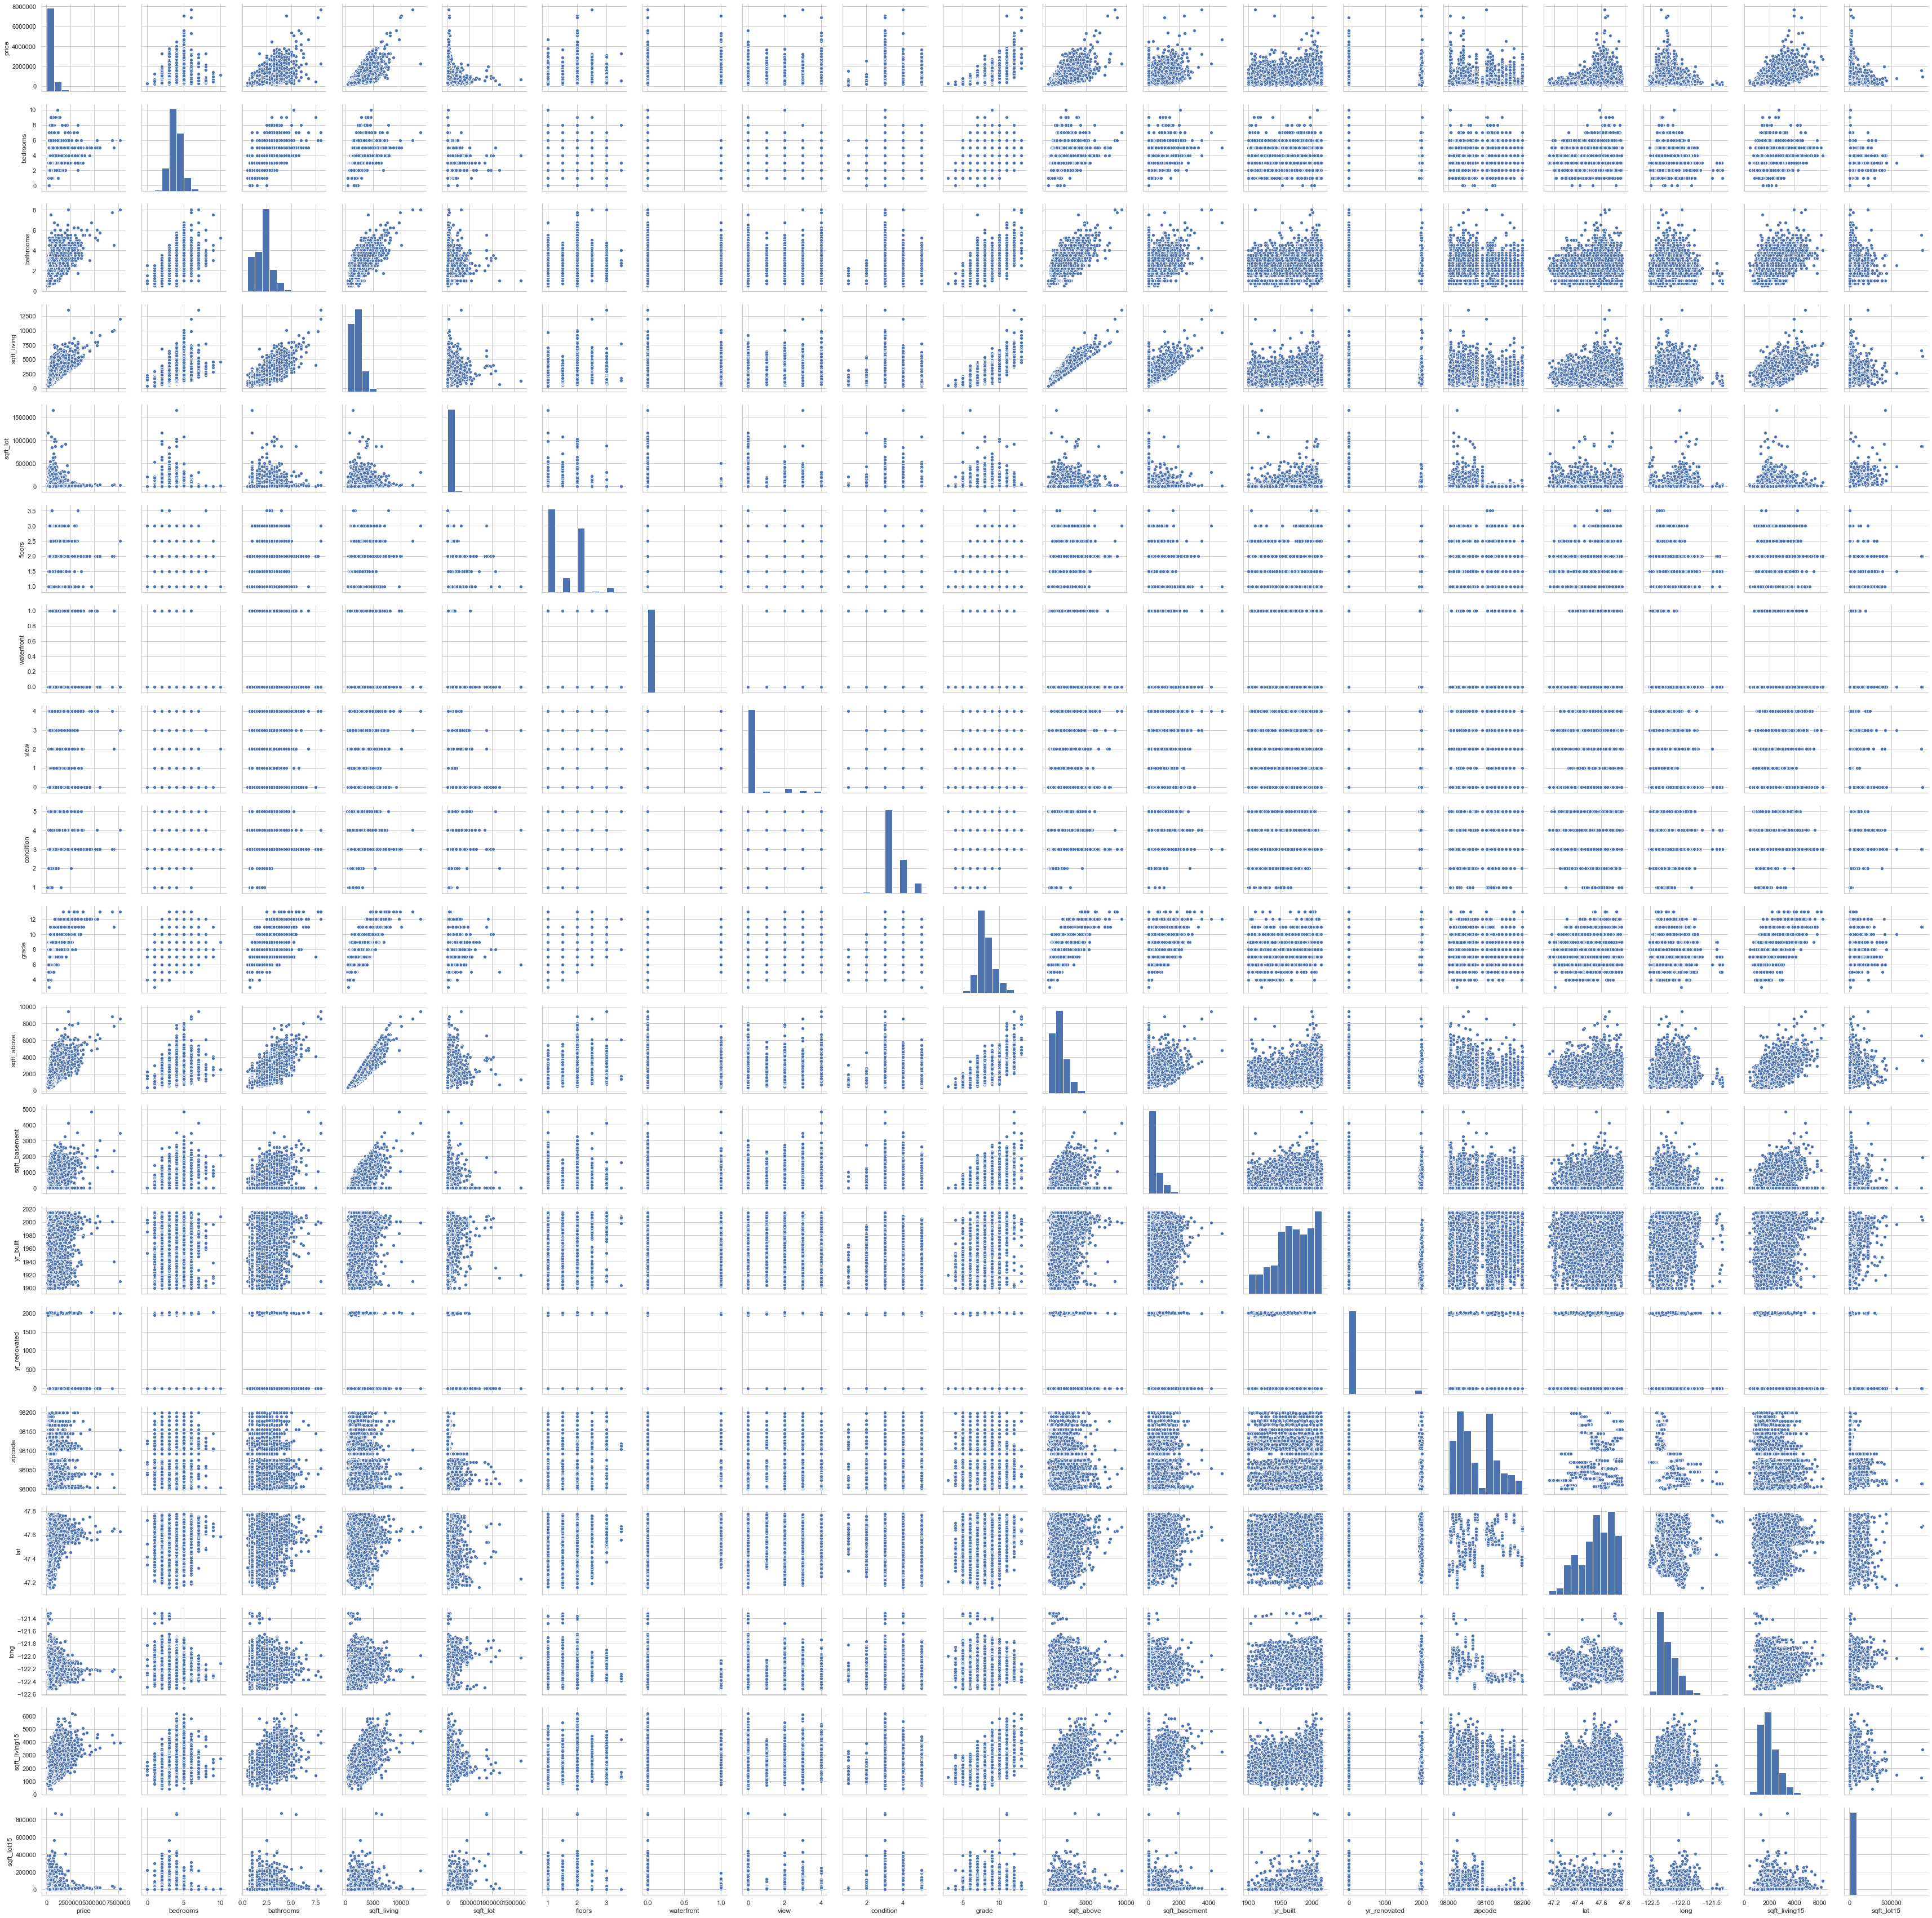

Wall time: 4min 27s


In [49]:
%%time

sns.pairplot(dataset)
plt.show()

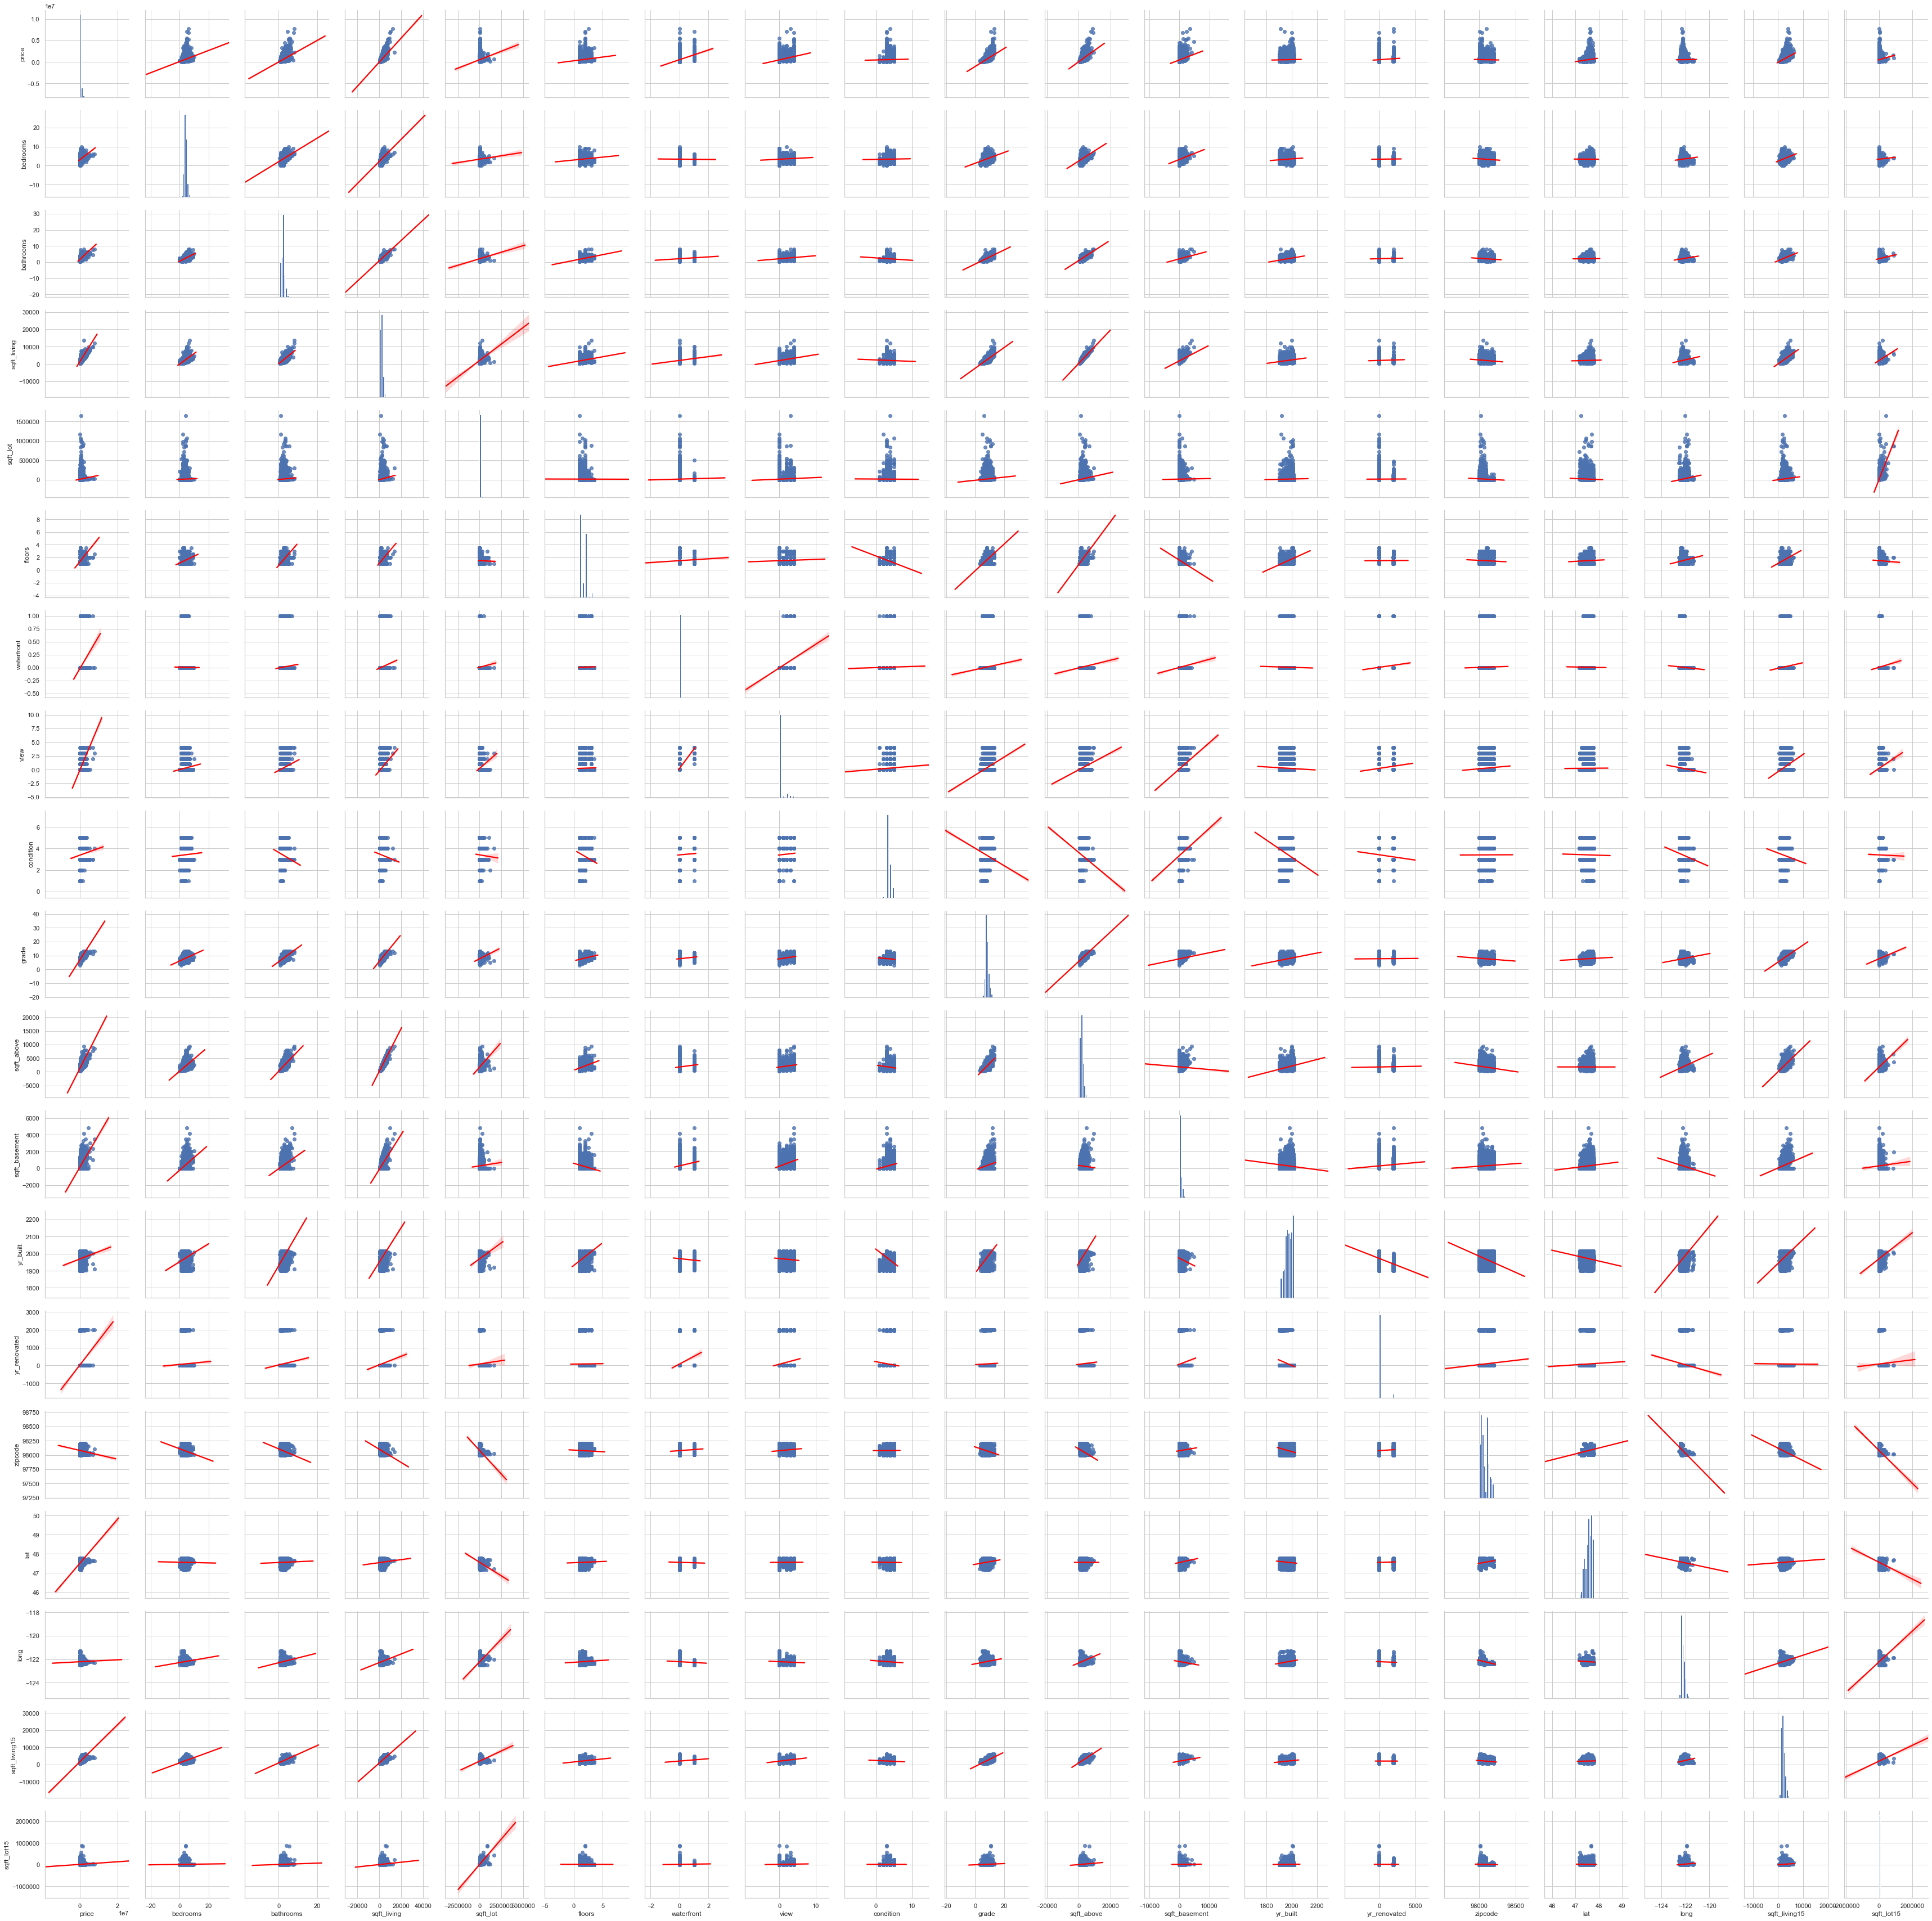

Wall time: 14min 41s


In [50]:
%%time

sns.pairplot(dataset, kind='reg', plot_kws={'line_kws':{'color': 'red'}})
plt.show()

## Training & Test Dataset Split

In [53]:
price = dataset['price'] # pick only the price colum
features = dataset.drop('price', axis=1) # pick all the features colum excluding the price

X_train, X_test, y_train, y_test = train_test_split(features, price, test_size=0.30, random_state = 5)

# % of training set
len(X_train)/len(features)

0.6999907390257455

In [54]:
# % of test data set
X_test.shape[0]/features.shape[0]

0.3000092609742545

## LinearRegression

In [55]:
# Train a simple linear regression model
regr = LinearRegression()
regr.fit(X_train, y_train)

#r-squared for training and testing datasets
print('Training data r-squared:', regr.score(X_train, y_train))
print('Test data r-squared:', regr.score(X_test, y_test))

Training data r-squared: 0.697320960021461
Test data r-squared: 0.7067201334332284


## Decision Tree Regressor

In [56]:
dt_regressor = DecisionTreeRegressor(random_state=0)
dt_regressor.fit(X_train,y_train)
y_train_pred = dt_regressor.predict(X_train)
y_test_pred = dt_regressor.predict(X_test)

#r-squared for training and testing datasets
print('Training data r-squared:', dt_regressor.score(X_train, y_train))
print('Test data r-squared:', dt_regressor.score(X_test,y_test))

Training data r-squared: 0.9992666639795964
Test data r-squared: 0.733852172723907


## Random Forest regressor

In [57]:
Rf = RandomForestRegressor(n_estimators = 200,
                              criterion = 'mse',
                              random_state = 20,
                              n_jobs = -1)
Rf.fit(X_train,y_train)
Rf_train_pred = Rf.predict(X_train)
Rf_test_pred = Rf.predict(X_test)



print('Training data r-squared:', r2_score(y_train,Rf_train_pred))
print('Test data r-squared:', r2_score(y_test,Rf_test_pred))

Training data r-squared: 0.9823287009268192
Test data r-squared: 0.8714102558053022


Conclusion
We applied three models Linear Regression, Decision Tree Regressor and RandomForest Regressor
As we can see random forest performing best (with accuracy ~ 0.87)